In [1]:
import requests
import json
from numerize import numerize
from matplotlib import pyplot as plt
import seaborn as sns
#import numpy as np
sns.set_theme()
import csv

import matplotlib
matplotlib.rcParams['font.family'] = 'serif'
from datetime import date
date_today = date.today()
EXPORT_PATH = r'C:\Users\Johan\Nextcloud\Kurse im Studium\_Masterarbeit\Thesis\Latex\Assets\Diagramme & Graphen\pycharm_exports'
# plt.savefig(EXPORT_PATH+"\MRR_dev_epochs.pdf", format="pdf", bbox_inches="tight")

font = {'family': 'serif', 'color':  'black','weight': 200, 'size': 14 }

In [2]:
polite = 'mailto=udevz@student.kit.edu'

In [3]:
# define request function for convenience.
# Concatenates request and polite header, sends request and returns response in JSON

def request(api_call):
    #https://api.openalex.org/authors?search=saier
    req_string = str(api_call+'&'+polite)
    req = requests.get(req_string)
    if req.status_code == 200:
        return req.json()
    else:
        print('Request not successful ', req.status_code)
        return
def random_work():
    return request('https://api.openalex.org/works/random?')
total_count = request('https://api.openalex.org/works?')['meta']['count']


In [5]:
random_work()

{'id': 'https://openalex.org/W3022693583',
 'doi': None,
 'title': "Collection of Location Data and Human Rights to Information projected onto the Apple Inc.'s Case",
 'display_name': "Collection of Location Data and Human Rights to Information projected onto the Apple Inc.'s Case",
 'publication_year': 2012,
 'publication_date': '2012-01-01',
 'ids': {'openalex': 'https://openalex.org/W3022693583', 'mag': '3022693583'},
 'host_venue': {'id': 'https://openalex.org/V4306513285',
  'issn_l': None,
  'issn': None,
  'display_name': 'Informatization Policy',
  'publisher': None,
  'type': 'journal',
  'url': None,
  'is_oa': False,
  'version': None,
  'license': None},
 'type': None,
 'open_access': {'is_oa': False, 'oa_status': None, 'oa_url': None},
 'authorships': [{'author_position': 'first',
   'author': {'id': 'https://openalex.org/A3022870796',
    'display_name': 'Lee Min-Yeong',
    'orcid': None},
   'institutions': [],
   'raw_affiliation_string': None}],
 'cited_by_count': 0,


In [6]:
# check items for each publication year
req_json = request('https://api.openalex.org/works?')
total_count = req_json['meta']['count']
print('Works count total: ',numerize.numerize(total_count)) # ~236.62 mio. on 24. June
print('Works count total: ',(total_count))

Works count total:  244.84M
Works count total:  244841578


In [ ]:
# check items for all publication year # last 50 years
years_all = range(1399,2025)
year_count_all = dict()
for y in years_all:
    req_json = request('https://api.openalex.org/works?filter=publication_year:'+str(y))
    year_count_all[y] = req_json['meta']['count']
    if y %100==0:
        print(y,year_count_all[y])
#year_count_all

In [10]:
# works before 2000
request('https://api.openalex.org/works?filter=publication_year:<2000')['meta']['count'] / request('https://api.openalex.org/works?')['meta']['count']

0.2806541962349657

In [101]:
cum = 0
avg_helper = 0
median_trigger = 0
for i in years_all:
    cum += year_count_all[i]
    prop = cum / total_count
    avg_helper += year_count_all[i]*i
    if i==1949:
        print(i," : ",prop,"%", "count overall until this year: ",cum)
    if (prop>0.45 and prop <=0.5 and median_trigger==0):
        print(i," : ",prop,"%", "count overall until this year: ",cum)
    if (prop>0.5 and median_trigger==0):
        print(i," : ",prop,"%", "count overall until this year: ",cum)
        median_trigger=1

    #print(i," : ",prop,"%")
    #list(year_count_all.values())
print('Average pub. year: '+str(avg_helper/total_count))

1949  :  0.03261864575877388 % count overall until this year:  7862563
2008  :  0.47129165445992344 % count overall until this year:  113602519
2009  :  0.5023999725661237 % count overall until this year:  121101025
Average year: 2002.1997399639579


In [4]:
# check items for each publication year # last 50 years
years = range(1973,2023)
year_count = dict()
for y in years:
    req_json = request('https://api.openalex.org/works?filter=publication_year:'+str(y))
    year_count[y] = req_json['meta']['count']
year_count

{1973: 951246,
 1974: 982212,
 1975: 1029786,
 1976: 1058116,
 1977: 1104243,
 1978: 1153024,
 1979: 1206010,
 1980: 1319631,
 1981: 1307178,
 1982: 1345256,
 1983: 1409053,
 1984: 1481471,
 1985: 1536897,
 1986: 1616126,
 1987: 1708632,
 1988: 1797340,
 1989: 1914227,
 1990: 2077799,
 1991: 2098714,
 1992: 2177783,
 1993: 2285193,
 1994: 2401928,
 1995: 2540651,
 1996: 2733011,
 1997: 2872555,
 1998: 3040628,
 1999: 3184209,
 2000: 3724154,
 2001: 3809828,
 2002: 4143823,
 2003: 4604161,
 2004: 5026439,
 2005: 5365726,
 2006: 5918112,
 2007: 6526780,
 2008: 6999773,
 2009: 7579364,
 2010: 8059171,
 2011: 8799877,
 2012: 9102230,
 2013: 9688466,
 2014: 10085342,
 2015: 10186639,
 2016: 10465240,
 2017: 10165187,
 2018: 9756422,
 2019: 9977365,
 2020: 10371318,
 2021: 9470382,
 2022: 6423597}

In [ ]:
year_count_scaled = {}
for y in year_count:
    year_count_scaled[y] = year_count[y]/1000000
year_count_scaled

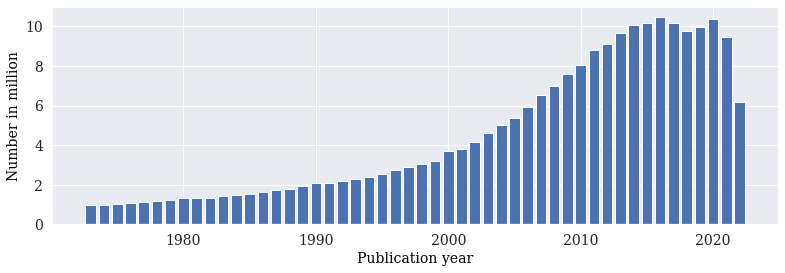

In [56]:
#plt.style.use('seaborn')
plt.bar(*zip(*year_count_scaled.items()))
#plt.title('Number of works for publication year')
plt.xlabel('Publication year', fontdict=font)
plt.xticks(fontsize=font['size'])
plt.ylabel('Number in million', fontdict=font)
plt.yticks(fontsize=font['size'])
plt.ticklabel_format(axis='y',style='plain')
plt.gcf().set_size_inches((13, 4))
plt.savefig(EXPORT_PATH+f"\Bar Publication Years {date_today}.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [6]:
# see oldest items in set
req_json = request('https://api.openalex.org/works?sort=publication_year:asc')
for w in req_json['results']:
    print(w['publication_year'],w['display_name'])
    continue

17 Comparison of functional exercise capacity in chronic obstructive pulmonary disease individuals with hypertensive and non-hypertensive
195 Réception de mots anglais dans les journaux français : proposition d'harmonisation graphique des mots d'emprunt anglais
200 Wöhler-Vereinigung für Anorganische Chemie, 13. Vortragstagung Aachen
202 A look into feminist term translation practices on digital feminist platforms in Turkey
207 YAŞANABİLİRLİK KAVRAMI BAĞLAMINDA KAMUSAL/AÇIK MEKÂNLARIN DEĞERLENDİRİLMESİ: KIRKLARELİ KENT MERKEZİ ÖRNEĞİ
208 A valid and advanced method for ranking the fuzzy numbers
208 Effect of Row Spacing on Yield, Yield Components and Crude Oil of Autumn and Spring Sowed Mustard (Sinapis arvensis L.) in Eight Locations of Turkey
208 Bernsteinn polynomials approach to determine timelike curves of constant breadth in Minkowski 3-space
209 DEĞER AKIŞI HARİTALANDIRMA YÖNTEMİ İLE VERİMLİLİĞİN ARTIRILMASI: OTOMOTİV SEKTÖRÜNDE BİR VAKA ÇALIŞMASI
209 Wpływ międzyplonów ściernis

In [5]:
# data quality note: all works published in the future ?!
# check items for each publication year # last 75 years
future_years = range(2023,2030)
future_year_count = {}
for y in future_years:
    req_json = request('https://api.openalex.org/works?filter=publication_year:'+str(y))
    future_year_count[y] = req_json['meta']['count']
future_year_count
# sometimes patterns seems as is 2018 was mistaken as 2028, 2017 as 2027 etc.

{2023: 12103, 2024: 619, 2025: 58, 2026: 0, 2027: 0, 2028: 0, 2029: 0}

In [24]:
# retrieve the count of entities if grouped according to document types
req_json = request('https://api.openalex.org/works?group_by=type')
type_count = dict()

for n in range(len(req_json['group_by'])):
    name = req_json['group_by'][n]['key_display_name']
    count = req_json['group_by'][n]['count']
    type_count[name] = count
for i in type_count.items():
    print(i) #percentage ,'-',i[1]/total_count)

('journal-article', 122895279)
('unknown', 69372054)
('book-chapter', 19453429)
('proceedings-article', 8823526)
('dissertation', 6457712)
('book', 4711635)
('posted-content', 4649282)
('dataset', 2843230)
('reference-entry', 1094711)
('journal-issue', 975028)
('other', 801843)
('report', 769757)
('monograph', 568294)
('standard', 358885)
('peer-review', 297468)
('reference-book', 222244)
('component', 202204)
('proceedings', 149893)
('journal', 54785)
('grant', 28242)
('report-series', 18948)
('book-part', 15997)
('journal-volume', 7818)
('book-series', 3137)
('proceedings-series', 1696)
('book-set', 432)


In [25]:
top_type_counts = []
top_type_labels = []
i=0
other_count = 0
for x in [t for t in type_count.items()]:
    if (x[1]/total_count)>0.01:
        top_type_counts.append(x[1])
        top_type_labels.append(x[0])
    else:
        other_count+=x[1]
    i+=1
top_type_counts.append(other_count)
top_type_labels.append("other")


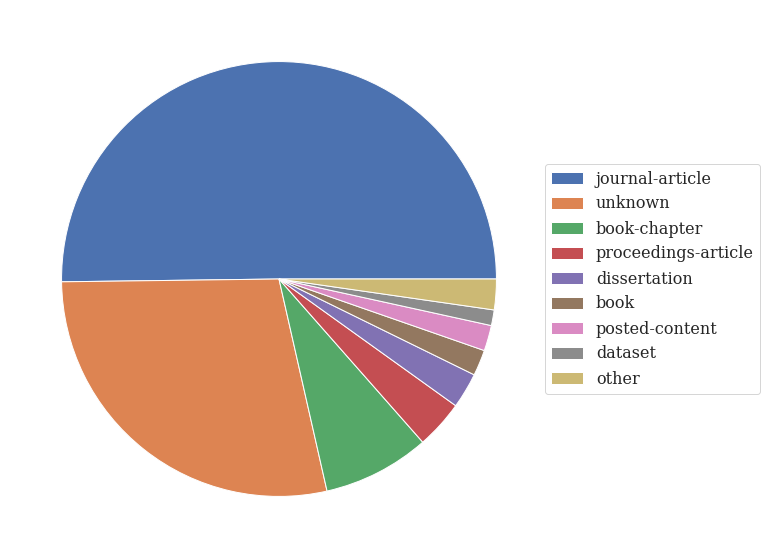

In [40]:
#plt.style.use('seaborn')
patches, texts = plt.pie(top_type_counts, startangle=0) #labels= top_type_labels,
#plt.title('Composition of works according to type label')

plt.gcf().set_size_inches((10,10))
plt.legend(patches, top_type_labels, loc="right", bbox_to_anchor=(1.4,0.5),prop={'size': 16},facecolor='white') #10,10;1.3,0.5
plt.savefig(EXPORT_PATH+f"\Pie Work Types {date_today}.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [12]:
# plot all document types that make up at least 1% of the items
total_count = request('https://api.openalex.org/works?')['meta']['count']
significant_type_count = [t for t in type_count.items() if (t[1]/total_count)>0.01]
#for i in significant_type_count: print(i[1])

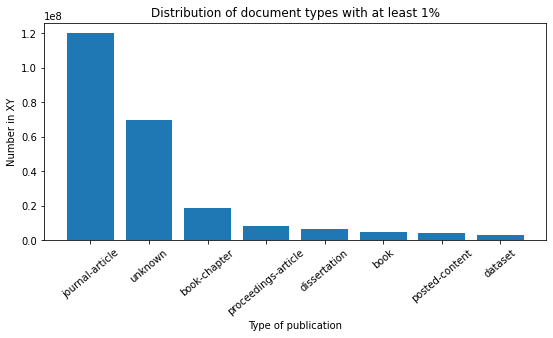

In [13]:
plt.bar([x[0] for x in significant_type_count], [y[1] for y in significant_type_count])
plt.title('Distribution of document types with at least 1%')
plt.xlabel('Type of publication')
plt.ylabel('Number in XY')
plt.xticks(rotation=40)
plt.gcf().set_size_inches((9, 4))
plt.show()

In [7]:
request('https://api.openalex.org/works?filter=publication_year:2010&group_by=type')['group_by'][1]['key']

'unknown'

In [8]:
request('https://api.openalex.org/works?filter=publication_year:2010&group_by=type')['group_by'][1]['count']

2944832

In [29]:
# check 'unknown' type over the years # last 10 years
years = range(2018,2023)
year_count_unknown = dict()
year_count_unknown_proportion = dict()
print("Proportion of unknown items: ")
for y in years:
    req_json = request('https://api.openalex.org/works?filter=publication_year:'+str(y)+'&group_by=type')
    for t in req_json['group_by']:
        if t['key']=='unknown':
            year_count_unknown_proportion[y] = (t['count']/year_count[y])
            print(y," : ",t['count']," : ",year_count_unknown_proportion[y])

Proportion of unknown items: 
2018  :  2462291  :  0.25253904046506
2019  :  2369808  :  0.2377134089550586
2020  :  2096879  :  0.20233937890481085
2021  :  1031862  :  0.10910037879388626
2022  :  6184  :  0.0010498655581281562


In [14]:
# what is the type: 'posted content'? according to Crossref.org this type includes:
# preprint, working_paper, letter, dissertation, report, other

In [ ]:
# analyze the 'unknowns' | filtering out 'unknowns' directly not possible. -> retrieve random items and check type 'attribute'
# PDFs retrieved in notebook 'fulltext retrieval' for screening

doi_list = []
oa_url_list = []
OA_id_list = []
title_list = []

for i in range(1000):
    if i%100==0: print(str(i))
    req_json = random_work()
    if type(req_json['type'])==type(None):
        print('Unknown type found! "',req_json['display_name'],'" | publisher: ',req_json['host_venue']['publisher'])
        #print('DOI:',req_json['doi'], '| is OA:',req_json['open_access']['is_oa'],'| OA URL:', req_json['open_access']['oa_url'],'| OA ID: ',req_json['id'])
        doi_list.append(req_json['doi'])
        oa_url_list.append(req_json['open_access']['oa_url'])
        OA_id_list.append(req_json['id'])
        title_list.append(req_json['display_name'])


# remove Nones from lists and write key info of items to files for screening
doi_list = [j for j in doi_list if j]
oa_url_list = [j for j in oa_url_list if j]
with open('./PDF_retrieval/unknown_type/doi_list.txt', 'w', encoding='utf-8') as file:
    file.write("\n".join(doi_list))
with open('./PDF_retrieval/unknown_type/oa_url_list.txt', 'w', encoding='utf-8') as file:
    file.write("\n".join(oa_url_list))
with open('./PDF_retrieval/unknown_type/OA_id_list.txt', 'w', encoding='utf-8') as file:
    file.write("\n".join(OA_id_list))
with open('./PDF_retrieval/unknown_type/title_list.txt', 'w', encoding='utf-8') as file:
    file.write("\n".join(title_list))
print('No. of unknown type items in above query: ',len(OA_id_list))

In [9]:
# analysis of OpenAccess status
req_json = request('https://api.openalex.org/works?filter=is_oa:true')
print(numerize.numerize(req_json['meta']['count'])) # ~147 mio.
print('That is ',numerize.numerize(100*req_json['meta']['count']/request('https://api.openalex.org/works?')['meta']['count']), '% of all works')

41.64M
That is  17.03 % of all works


In [10]:
# analysis of OpenAccess status
req_json = request('https://api.openalex.org/works?filter=is_oa:true')
print(numerize.numerize(req_json['meta']['count'])) # ~147 mio.
print('That is ',numerize.numerize(100*req_json['meta']['count']/request('https://api.openalex.org/works?')['meta']['count']), '% of all works')

41.64M
That is  17.03 % of all works


In [11]:
# check Open Access availability coverage over the years # last 50 years
years = range(1973,2023)
year_count_with_OA = dict()
year_count_OA_proportion = dict()
for y in years:
    req_json = request('https://api.openalex.org/works?filter=is_oa:true,publication_year:'+str(y))
    #year_count_with_OA[y] = req_json['meta']['count']
    year_count_OA_proportion[y] = (req_json['meta']['count']/year_count[y])

In [12]:
year_count_OA_proportion

{1973: 0.09229250507777512,
 1974: 0.09172731456404784,
 1975: 0.08921506360018414,
 1976: 0.09315038709860379,
 1977: 0.09623066374158298,
 1978: 0.09631287436187701,
 1979: 0.09651844277419927,
 1980: 0.09284207047723572,
 1981: 0.09598455468455866,
 1982: 0.0918048974905789,
 1983: 0.09135808604287946,
 1984: 0.09252325404730152,
 1985: 0.09094997504056315,
 1986: 0.0903794021167296,
 1987: 0.09149060349213022,
 1988: 0.09023657690015309,
 1989: 0.09142935375013456,
 1990: 0.08875702899307704,
 1991: 0.09159432529738046,
 1992: 0.09258585608054419,
 1993: 0.09335792728006503,
 1994: 0.0943557545865819,
 1995: 0.09590537732963089,
 1996: 0.10201471877822722,
 1997: 0.10343892222032641,
 1998: 0.10266029979981545,
 1999: 0.10339559741887977,
 2000: 0.09711639415108332,
 2001: 0.09943808070507455,
 2002: 0.10039987302552887,
 2003: 0.09913417891463336,
 2004: 0.1004493845860868,
 2005: 0.10514443385838411,
 2006: 0.10466856155517197,
 2007: 0.10637534219325821,
 2008: 0.110003881084485

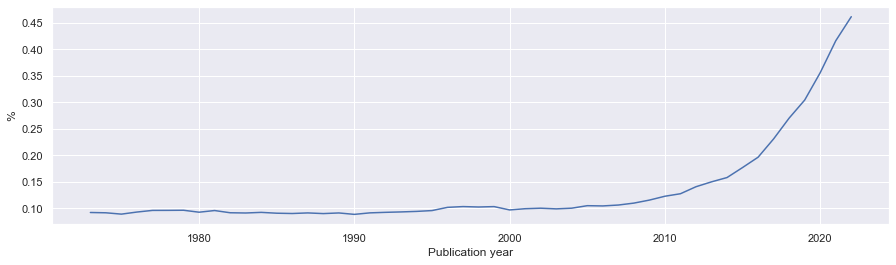

In [14]:
#plt.style.use('seaborn-whitegrid')
plt.plot(*zip(*year_count_OA_proportion.items()))
#plt.title('Proportion of works in OpenAlex that is open-access = true for publication year')
plt.xlabel('Publication year')
plt.ylabel('%')
plt.gcf().set_size_inches((15, 4))
plt.show()

# note for above Delayed OA: articles are published in a subscription journal, but are made free to read
# after an embargo period (Willinsky, 2009; Laakso & Björk, 2013). (Piwowar OA Paper, 2018)

In [66]:
# analysis of OpenAccess status
# meaning: https://docs.openalex.org/about-the-data/work#oa_status
oa_types = ['gold','green','hybrid','bronze'] # closed means is_oa=false
oa_type_count={}
for oa_type in oa_types:
    req_json = request('https://api.openalex.org/works?filter=oa_status:'+oa_type)
    oa_type_count[oa_type] = req_json['meta']['count']
oa_type_count

{'gold': 13260456, 'green': 10242203, 'hybrid': 4533241, 'bronze': 13810215}

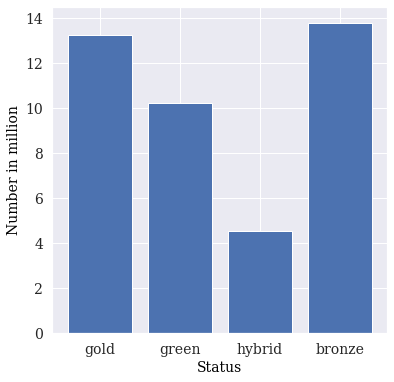

In [80]:
oa_type_count_scaled = {}
for t in oa_type_count:
    oa_type_count_scaled[t] = oa_type_count[t]/1000000

plt.bar(*zip(*oa_type_count_scaled.items()))
#plt.barh(*zip(*oa_type_count.items()))
#plt.title('Number of works according to open access status')
plt.xlabel('Status',fontdict=font)
plt.xticks(fontsize=font['size'])
plt.ylabel('Number in million', fontdict=font)
plt.yticks(fontsize=font['size'])
plt.ticklabel_format(axis='y',style='plain')
plt.gcf().set_size_inches((6, 6))
plt.savefig(EXPORT_PATH+f"\Bar Works Open Access Levels {date_today}.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [8]:
# analysis of DOI status
req_json = request('https://api.openalex.org/works?filter=has_doi:false')
print('Works with no associated DOI: ',numerize.numerize(req_json['meta']['count'])) # ~147 mio.
print('That is ',numerize.numerize(100*req_json['meta']['count']/request('https://api.openalex.org/works?')['meta']['count']), '% of all works')

Works with no associated DOI:  103.49M
That is  42.86 % of all works


In [13]:
# Open-access and DOI!
req_json = request('https://api.openalex.org/works?filter=is_oa:true,has_doi:true')
print(numerize.numerize(req_json['meta']['count'])) # ~44.85 mio.
print('That is ',numerize.numerize(100*req_json['meta']['count']/request('https://api.openalex.org/works?')['meta']['count']), '% of all works')

40.63M
That is  16.61 % of all works


In [5]:
# check DOI coverage over the years # last 50 years
years = range(1973,2023)
year_count_with_doi = dict()
year_count_doi_proportion = dict()
for y in years:
    req_json = request('https://api.openalex.org/works?filter=has_doi:true,publication_year:'+str(y))
    year_count_doi_proportion[y] = (req_json['meta']['count']/year_count[y])
    #if y>2017:
    print(str(y),':',str(numerize.numerize(year_count_doi_proportion[y])))

1973 : 0.58
1974 : 0.58
1975 : 0.57
1976 : 0.57
1977 : 0.58
1978 : 0.58
1979 : 0.58
1980 : 0.56
1981 : 0.59
1982 : 0.58
1983 : 0.58
1984 : 0.59
1985 : 0.58
1986 : 0.58
1987 : 0.58
1988 : 0.58
1989 : 0.58
1990 : 0.56
1991 : 0.58
1992 : 0.58
1993 : 0.57
1994 : 0.56
1995 : 0.56
1996 : 0.55
1997 : 0.54
1998 : 0.53
1999 : 0.52
2000 : 0.52
2001 : 0.5
2002 : 0.49
2003 : 0.49
2004 : 0.48
2005 : 0.47
2006 : 0.47
2007 : 0.48
2008 : 0.47
2009 : 0.46
2010 : 0.45
2011 : 0.47
2012 : 0.47
2013 : 0.49
2014 : 0.5
2015 : 0.51
2016 : 0.54
2017 : 0.62
2018 : 0.65
2019 : 0.68
2020 : 0.74
2021 : 0.85
2022 : 0.98


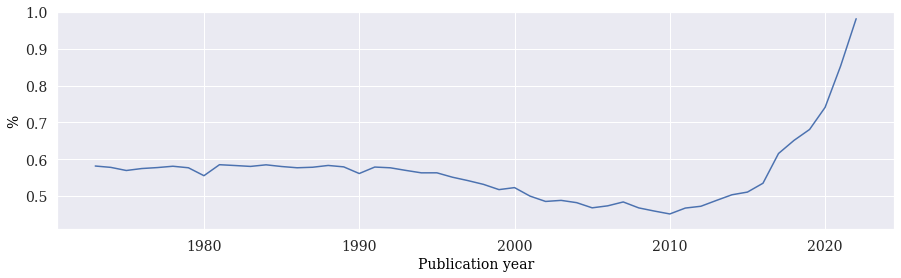

In [71]:
plt.plot(*zip(*year_count_doi_proportion.items()))
#plt.title('Proportion of works in OpenAlex with DOI for publication year')
plt.xlabel('Publication year',fontdict=font)
plt.xticks(fontsize=font['size'])
plt.ylabel('%', fontdict=font)
plt.yticks(fontsize=font['size'])
plt.ylim(0.41, 1)
plt.gcf().set_size_inches((15, 4))
plt.savefig(EXPORT_PATH+f"\Graph Works DOI Proportion {date_today}.pdf", format="pdf", bbox_inches="tight")

plt.show()

Works with zero citation count:  162.57M
That is  67.44 % of all works


In [14]:
req_json = request('https://api.openalex.org/works?filter=is_retracted:true') # This field has high precision but low recall!
print('Works that were retracted: ',numerize.numerize(req_json['meta']['count']))
print('That is ',numerize.numerize(100*req_json['meta']['count']/request('https://api.openalex.org/works?')['meta']['count']), '% of all works')

Works that were retracted:  9.43K
That is  0 % of all works


In [15]:
req_json = request('https://api.openalex.org/works?filter=is_paratext:true')
print('Works that are determined as paratext (front / back covers, content tables etc.): ',numerize.numerize(req_json['meta']['count']))
print('That is ',numerize.numerize(100*req_json['meta']['count']/request('https://api.openalex.org/works?')['meta']['count']), '% of all works')

Works that are determined as paratext (front / back covers, content tables etc.):  790.41K
That is  0.32 % of all works


In [27]:
request('https://api.openalex.org/works?group_by=institutions.country_code')


{'meta': {'count': 200,
  'db_response_time_ms': 684,
  'page': 1,
  'per_page': 200},
 'results': [],
 'group_by': [{'key': 'unknown',
   'key_display_name': 'unknown',
   'count': 165570524},
  {'key': 'US',
   'key_display_name': 'United States of America',
   'count': 21869148},
  {'key': 'CN', 'key_display_name': 'China', 'count': 9993049},
  {'key': 'GB',
   'key_display_name': 'United Kingdom of Great Britain and Northern Ireland',
   'count': 5534465},
  {'key': 'DE', 'key_display_name': 'Germany', 'count': 4467936},
  {'key': 'JP', 'key_display_name': 'Japan', 'count': 4127996},
  {'key': 'FR', 'key_display_name': 'France', 'count': 3228508},
  {'key': 'CA', 'key_display_name': 'Canada', 'count': 2779252},
  {'key': 'IN', 'key_display_name': 'India', 'count': 2602272},
  {'key': 'IT', 'key_display_name': 'Italy', 'count': 2388658},
  {'key': 'BR', 'key_display_name': 'Brazil', 'count': 2243925},
  {'key': 'AU', 'key_display_name': 'Australia', 'count': 2103053},
  {'key': 'ES'

In [21]:
# analyze publications by their involved country codes
req_json = request('https://api.openalex.org/works?group_by=institutions.country_code')

for i in req_json['group_by']:
    #print(i['key_display_name'],':',i['count']) #total of the counts is 250 mio.
    continue

print(numerize.numerize(100*req_json['group_by'][0]['count']/request('https://api.openalex.org/works?')['meta']['count']), '% of all works are connected to at least one institution that is of unknown country code')

# check again in autumn. maybe country code coverage improves for institutions.
# status 06/30/22: 69.89%

69.85 % of all works are connected to at least one institution that is of unknown country code


In [5]:
years = range(1972,2023)
country_codes=['US','CN','GB','IN','DE','JP','BR','CA','FR','AU']
# top 5 countries (total publications to date) are
# country_codes=['US','CN','GB','DE','JP']
country_count_over_years = dict()

for c in country_codes:
    specific_country_count_over_years = dict()
    for y in years[:-1]: #leave out current year 2022
        req_json = request('https://api.openalex.org/works?filter=publication_year:'+str(y)+',institutions.country_code:'+c)
        specific_country_count_over_years[y]=req_json['meta']['count']
    country_count_over_years[c] = specific_country_count_over_years

In [ ]:
plt.plot(*zip(*country_count_over_years['US'].items()),label='US')
plt.plot(*zip(*country_count_over_years['CN'].items()),label='CN')
plt.plot(*zip(*country_count_over_years['GB'].items()),label='GB')
plt.plot(*zip(*country_count_over_years['DE'].items()),label='DE')
plt.plot(*zip(*country_count_over_years['JP'].items()),label='JP')
plt.plot(*zip(*country_count_over_years['IN'].items()),label='IN')
plt.plot(*zip(*country_count_over_years['JP'].items()),label='BR')
plt.plot(*zip(*country_count_over_years['JP'].items()),label='CA')
plt.plot(*zip(*country_count_over_years['JP'].items()),label='FR')
plt.plot(*zip(*country_count_over_years['AU'].items()),label='AU')

plt.legend()
plt.title("No. of publications for top 5 / top 10 countries")
# counted via involved institutions' country code | one publication can be listed for more than one country!
plt.xlabel('Year')
plt.ylabel('Count in mio')
plt.gcf().set_size_inches((9,9))
plt.show()

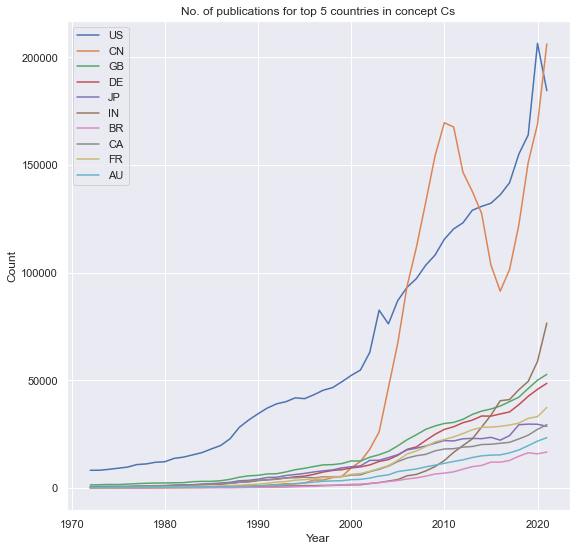

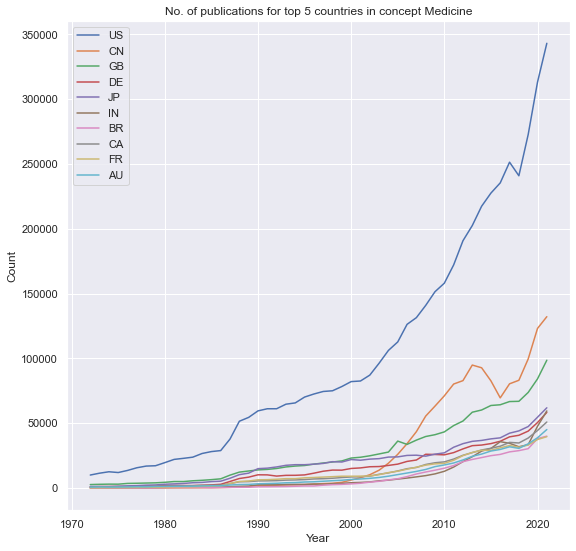

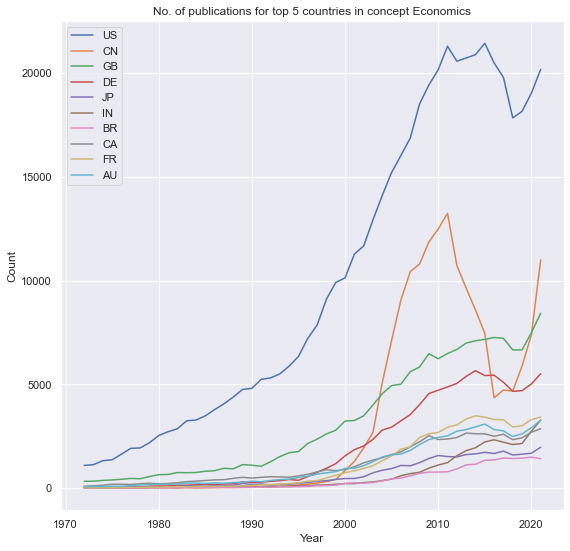

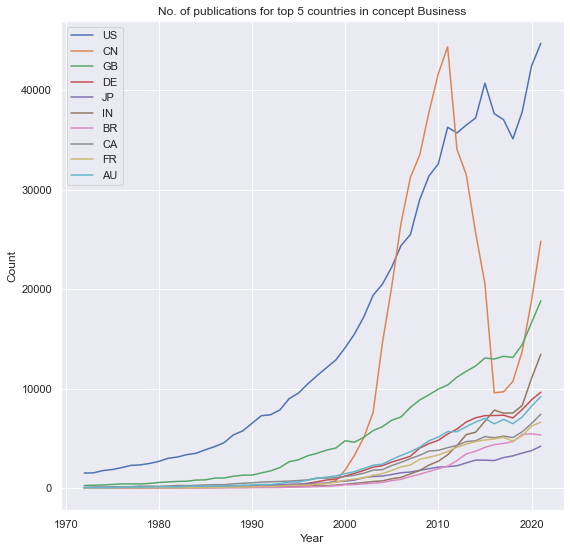

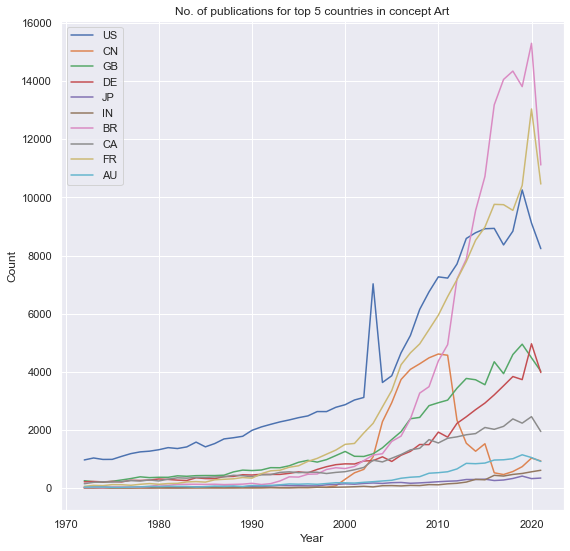

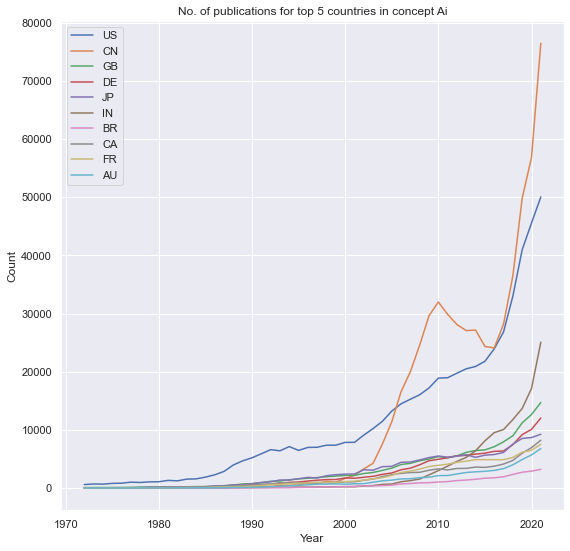

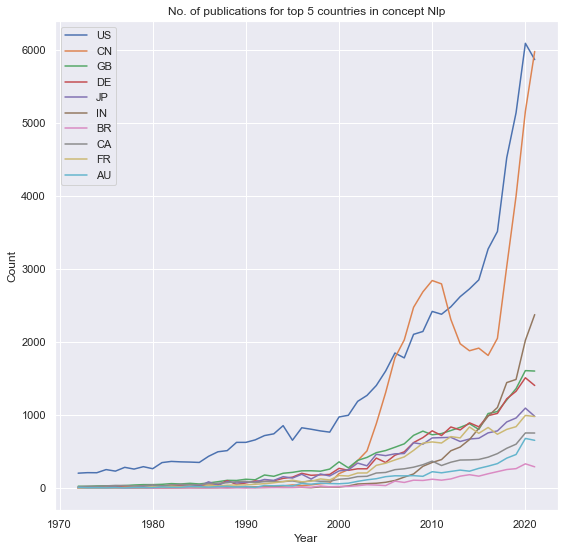

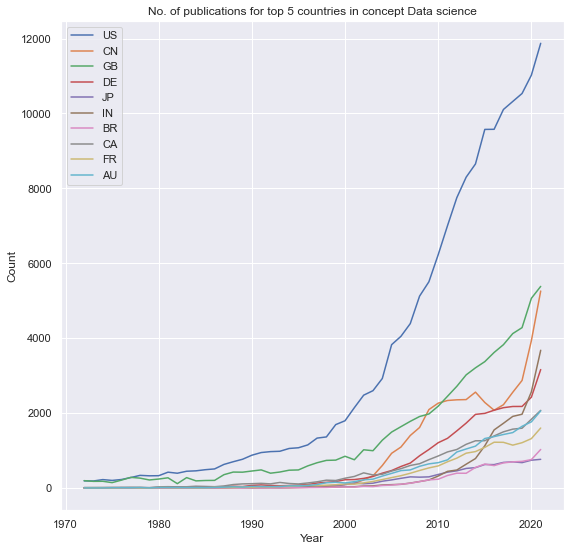

In [6]:
# see the above development for selected disciplines (all lvl-0 besides AI, DS, NLP (lvl-1))

concept_ids = {'cs':'C41008148','medicine':'C71924100','economics':'C162324750','business':'C144133560','art':'C142362112','ai':'C154945302','nlp':'C204321447','data science':'C2522767166'}
years = range(1972,2023)
country_codes = ['US','CN','GB','IN','DE','JP','BR','CA','FR','AU']
#country_codes = ['US','CN','GB','DE','JP']
country_count_over_years = dict()

for con in concept_ids.items():
    for c in country_codes:
        specific_country_count_over_years = dict()
        for y in years[:-1]: # leave out current year 2022
            req_json = request('https://api.openalex.org/works?filter=publication_year:'+str(y)+',institutions.country_code:'+c+',concept.id:'+con[1])
            #print(req_json['meta']['count'])
            specific_country_count_over_years[y]=req_json['meta']['count']
        country_count_over_years[c] = specific_country_count_over_years

    plt.plot(*zip(*country_count_over_years['US'].items()),label='US')
    plt.plot(*zip(*country_count_over_years['CN'].items()),label='CN')
    plt.plot(*zip(*country_count_over_years['GB'].items()),label='GB')
    plt.plot(*zip(*country_count_over_years['DE'].items()),label='DE')
    plt.plot(*zip(*country_count_over_years['JP'].items()),label='JP')
    plt.plot(*zip(*country_count_over_years['IN'].items()),label='IN')
    plt.plot(*zip(*country_count_over_years['BR'].items()),label='BR')
    plt.plot(*zip(*country_count_over_years['CA'].items()),label='CA')
    plt.plot(*zip(*country_count_over_years['FR'].items()),label='FR')
    plt.plot(*zip(*country_count_over_years['AU'].items()),label='AU')
    plt.legend()
    plt.title("No. of publications for top 5 countries in concept "+str(con[0]).capitalize())
    # counted via involved institutions' country code | one publication can be listed for more than one country!
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.gcf().set_size_inches((9,9))
    plt.show()

In [16]:
# below is quality analysis of entries from 2022 (recent ones that were therefore not imported from MAG source)
# -> assess OpenAlex import mechanisms
# also see DOI coverage development above (>0.95 in 2022!)

In [56]:
# finding 1: "unknowns" decreased drastically since OA took over
years = range(2018,2023)
for y in years:
    req_json = request('https://api.openalex.org/works?group_by=type&filter=publication_year:'+str(y))
    for n in range(len(req_json['group_by'])):
        if req_json['group_by'][n]['key_display_name']=='unknown':
            print('#Pubs of unknown type in year', y, ":", str(req_json['group_by'][n]['count']))


#Pubs of unknown type in year 2018 : 2487080
#Pubs of unknown type in year 2019 : 2389009
#Pubs of unknown type in year 2020 : 2101864
#Pubs of unknown type in year 2021 : 1036279
#Pubs of unknown type in year 2022 : 5830
